# Tarefa 2

## Exercício 1

Séries originais

In [1]:
A <- c( 4.04, 4.66, 5.98, 13.70, 18.40, 17.60, 15.00, 12.00, 11.70, 7.70, 
      9.70, 7.70, 10.44, 14.90, 8.68, 6.12, 5.16, 5.55 )

In [2]:
B <- c( 1.00, 2.58, 5.16, 7.66, 6.50, 8.50, 7.66, 11.2, 12.88, 12.50,
 17.50, 17.66, 6.50, 4.50, 7.44, 4.56, 2.89, 1.59 )

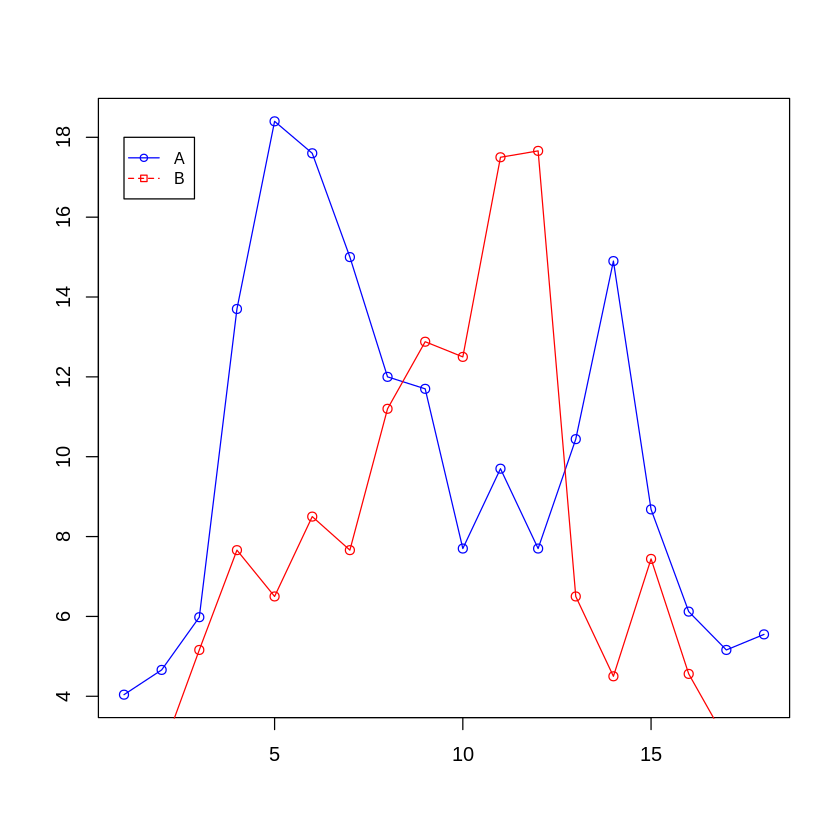

In [3]:
plot(A, type="o", col="blue", ann=F)
lines(B, type="o", col="red")
legend(1, 18, c("A","B"), cex=0.8, 
   col=c("blue","red"), pch=21:22, lty=1:2);

Normalizando as séries

In [4]:
ANorm <- (A - mean(A))/sd(A);ANorm

[1] -1.30361189 -1.16676391 -0.87541015  0.82856792  1.86596389  1.68938586
 [7]  1.11550723  0.45333959  0.38712282 -0.49576737 -0.05432227 -0.49576737
[13]  0.10901241  1.09343498 -0.27945927 -0.84450899 -1.05640264 -0.97032084

In [5]:
BNorm <- (B - mean(B))/sd(B);BNorm

[1] -1.345862153 -1.027635352 -0.507999183 -0.004475764 -0.238110630
 [6]  0.164708105 -0.004475764  0.708513398  1.046881136  0.970345576
[11]  1.977392415  2.009617914 -0.238110630 -0.640929366 -0.048785825
[16] -0.628844804 -0.965198448 -1.227030626

Applicando Piecewise Aggregate Approximation para reduzir para 9 dimenssões (W = 9), a partir das séries de 18 pontos (N = 18)

In [6]:
N <- length(A);
W <- 9;
dim(ANorm) <- c(N/W, W);
AReduced <- W/N * colSums(ANorm);ANorm;
dim(BNorm) <- c(N/W, W);
BReduced <- W/N * colSums(BNorm);BNorm;

-1.303612,-0.8754101,1.865964,1.1155072,0.3871228,-0.05432227,0.1090124,-0.2794593,-1.0564026
-1.166764,0.8285679,1.689386,0.4533396,-0.4957674,-0.49576737,1.0934350,-0.8445090,-0.9703208


-1.345862,-0.507999183,-0.2381106,-0.004475764,1.0468811,1.977392,-0.2381106,-0.04878582,-0.9651984
-1.027635,-0.004475764,0.1647081,0.708513398,0.9703456,2.009618,-0.6409294,-0.62884480,-1.2270306


Discretizando as séries, usando uma representação SAX

In [7]:
discretize4symbols <- function(serie) {
    res <- c();
    cuts <- c(-0.67, 0, 0.67, Inf);
    for (i in serie){
        for (j in 1:length(cuts)){
          if (i < cuts[j]){
              res <- c(res, letters[j]);
              break;
          }  
        } 
    }
    return(res);
}

A_ <- discretize4symbols(AReduced);A_;
B_ <- discretize4symbols(BReduced);B_;


[1] "a" "b" "d" "d" "b" "b" "c" "b" "a"

[1] "a" "b" "b" "c" "d" "d" "b" "b" "a"

Calculando a distância entre as séries

In [13]:
saxDist4Symbols <- function (A, B){
    diff <- abs(match(A, letters) - match(B, letters));
    if (diff == 2 ){
        return(0.67);
    }
    if (diff == 3){
        return(1.34);
    }
    
    return(0);
}

saxDist4Symbols <- Vectorize(saxDist4Symbols, USE.NAMES = F);

distParcial <- saxDist4Symbols(A_, B_);
distParcial
MINDIST <- sqrt(N/W) * sqrt(sum(distParcial^2));MINDIST;

[1] 0.00 0.00 0.67 0.00 0.67 0.67 0.00 0.00 0.00

[1] 1.641158

## Exercícios 2

In [9]:
matriz <- read.csv(“transacoes.csv”, header = TRUE)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:19: unexpected input
1: matriz <- read.csv(<e2>
                      ^
